# Spark SQL

### Create a DataFrame from RDD

In [5]:

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName('Spark').getOrCreate()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2004043674.py, line 1)

In [4]:
customers = sc.parallelize([(1201,  'satish', 25), (1202, "krishna", 28), (1203, "mary", 39), (1204, "pablo", 23)])
names = ['id', 'name', 'age']

data = spark.createDataFrame(customers, schema=names)
type(data)

NameError: name 'sc' is not defined

### Create a DataFrame from reading a CSV/JSON/TXT

In [ ]:
# Create an DataFrame from file_path
titanic_df = spark.read.csv("titanic.csv", header=True, inferSchema=True)

# Check the type of people_df
print("The type of titanic_df is", type(titanic_df))

The type of titanic_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [154]:
titanic_df.columns

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [158]:
titanic_df.select('fare').describe().show()

+-------+-----------------+
|summary|             fare|
+-------+-----------------+
|  count|             1308|
|   mean|33.29547928134572|
| stddev|51.75866823917421|
|    min|              0.0|
|    max|         512.3292|
+-------+-----------------+



In [160]:
titanic_df.printSchema()

root
 |-- pclass: integer (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: double (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: integer (nullable = true)
 |-- home.dest: string (nullable = true)



In [142]:
titanic_df.dtypes

[('pclass', 'int'),
 ('survived', 'int'),
 ('name', 'string'),
 ('sex', 'string'),
 ('age', 'double'),
 ('sibsp', 'int'),
 ('parch', 'int'),
 ('ticket', 'string'),
 ('fare', 'double'),
 ('cabin', 'string'),
 ('embarked', 'string'),
 ('boat', 'string'),
 ('body', 'int'),
 ('home.dest', 'string')]

### select operation

In [128]:
titanic_df.select(['sex', 'age', 'survived']).show(5)

+------+----+--------+
|   sex| age|survived|
+------+----+--------+
|female|29.0|       1|
|  male|0.92|       1|
|female| 2.0|       0|
|  male|30.0|       0|
|female|25.0|       0|
+------+----+--------+
only showing top 5 rows



### filter operation

In [129]:
titanic_df.select(['sex', 'age', 'survived']).filter(titanic_df.age < 10).show(5)

+------+----+--------+
|   sex| age|survived|
+------+----+--------+
|  male|0.92|       1|
|female| 2.0|       0|
|  male| 4.0|       1|
|  male| 6.0|       1|
|  male| 1.0|       1|
+------+----+--------+
only showing top 5 rows



### groupby and count operation

In [138]:
titanic_df.groupby('survived').count().orderBy('survived').show()

+--------+-----+
|survived|count|
+--------+-----+
|       0|  809|
|       1|  500|
+--------+-----+



In [149]:
titanic_df.select('pclass').dropDuplicates().orderBy('pclass').withColumnRenamed('pclass','passenger_class').show()

+---------------+
|passenger_class|
+---------------+
|              1|
|              2|
|              3|
+---------------+



## Exercise | Titanic dataset

In [ ]:
# Load the Dataframe
titanic_df = spark.____(____, header=True, inferSchema=True)

# Check the schema of columns
titanic_df.____()

# Show the first 10 observations
titanic_df.____(____)

# Print the total number of rows
print("There are {} rows in the titanic_df DataFrame".format(titanic_df.____()))

In [ ]:
# Filter people_df to select females 
titanic_df_female = titanic_df._______(_______.sex == "female")

# Filter people_df to select males
titanic_df_male = titanic_df.________(________.sex == ______)

# Count the number of rows 
print("There are {} rows in the titanic_df_female DataFrame and {} rows in the titanic_df_male DataFrame".format(people_df_female.______, people_df_male._____))

In [ ]:
# Create a temporary view of titanic_df
titanic_df.____('titanic_table')

# Construct the "query" to show fares that are higher than $150
query = '''SELECT ____ FROM ____ WHERE ______'''

# Apply and show the results of the SQL "query"
spark.____(____).show()

## SQL query on titanic_df

In [171]:
titanic_df.createOrReplaceTempView("table1")
df2 = spark.sql("SELECT sex FROM table1 WHERE sex == 'male'")
df2.count()

843

In [172]:
df2.show(5)

+----+
| sex|
+----+
|male|
|male|
|male|
|male|
|male|
+----+
only showing top 5 rows



### Data Visualization in Spark

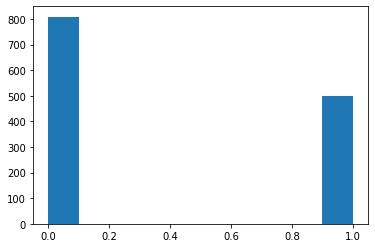

In [243]:
from pyspark_dist_explore import hist
fig, ax = plt.subplots()
hist(ax, titanic_df.select("survived"))

### Using Pandas for Plotting DataFrames

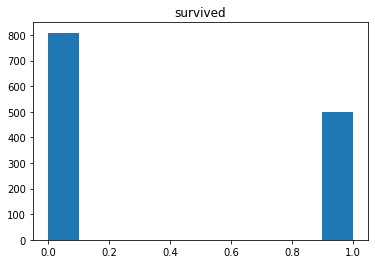

In [220]:
titanic_df_pandas = titanic_df.toPandas()
titanic_df_pandas.hist('pclass')
plt.grid(visible=None)
plt.show()

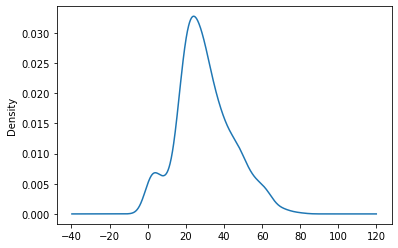

In [213]:
import matplotlib.pyplot as plt
titanic_df_pandas['age'].plot(kind = 'density')
plt.show()